In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
def load_dataset():
    n = 70
    x = np.linspace(-6, 6,n).reshape((n,1))
    y = x*x - 2*x + 1+np.random.randint(-1,1,[n,1])
    return x , y

def test_1():
    x,y = load_dataset()
    plt.scatter(x,y)
    plt.show()
    # y = w1*x^2 + w2*x + b
    w1 = 100
    w2 = 100
    b = 0
    time = 8000
    r = 0.0005
    t = 0
    n = 70
    while( t < time) :
        yp = w1*x*x + w2*x + b
        loss = np.sum((yp - y)**2) / n # each loss = (w1*x*x + w2*x + b - y)^2
        dloss_dw1 = np.sum(2*(yp-y)*x*x)/n
        dloss_dw2 = np.sum(2*(yp-y)*x)/n
        dloss_db = np.sum(2*(yp-y)) / n
        w1 = w1 - r*dloss_dw1
        w2 = w2 - r*dloss_dw2
        b = b - r*dloss_db
        if(t%500 == 0):
            y_ = w1*x*x + w2*x + b
            plt.plot(x,y_,'r')
            plt.scatter(x,y)
            plt.show()
            print(loss)
        t = t+1
    y_ = w1*x*x + w2*x + b
    plt.plot(x,y_,'r')
    plt.scatter(x,y)
    plt.show()
    
    return 0

def test_2():
    x0 ,y0 = load_dataset()
    x = torch.from_numpy(x0)
    y = torch.from_numpy(y0)
    w1 = torch.tensor(1.0,requires_grad = True)
    w2 = torch.tensor(1.0,requires_grad = True)
    b = torch.tensor(1.0,requires_grad = True)
    r = 0.0007
    time = 5000
    t = 0
    while( t < time):
        yp = w1*x*x + w2*x + b
        loss = (yp - y)**2
        loss = loss.sum()/70
        loss.backward()
        with torch.no_grad():
            w1 -= r*w1.grad
            w2 -= r*w2.grad
            b  -= r*b.grad
            if(t%500 == 0):
                y_ = w1*x*x + w2*x + b
                plt.plot(x.numpy(),y_.numpy(),'r')
                plt.scatter(x.numpy(),y.numpy())
                plt.show()
                print(loss)
        t = t+1
        

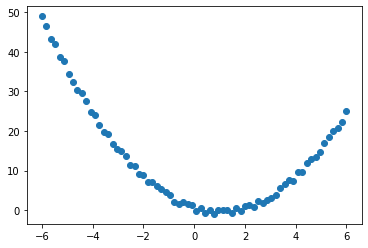

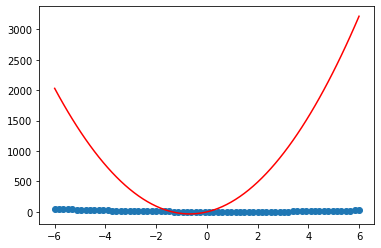

2816240.8351407195


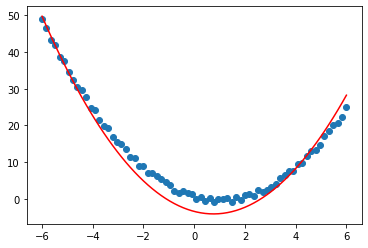

7.993620697832494


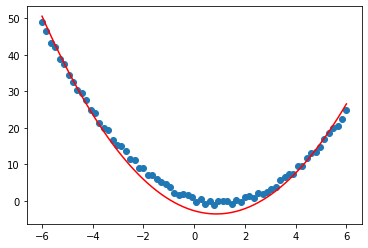

4.887110655320548


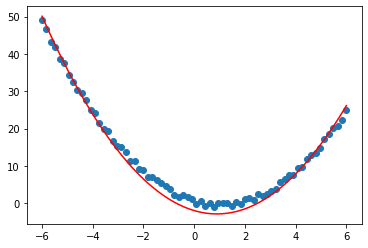

3.2246460002585855


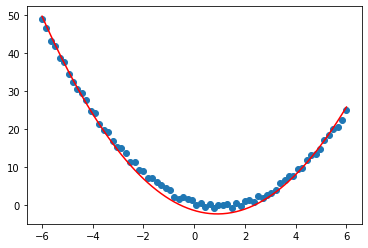

2.1576918942779675


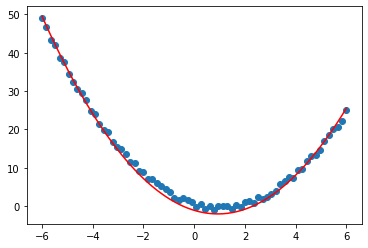

1.4729299770926003


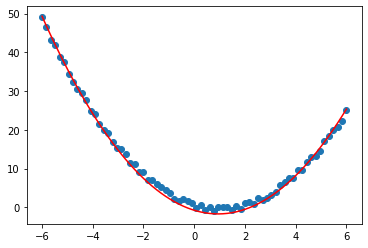

1.0334557011113585


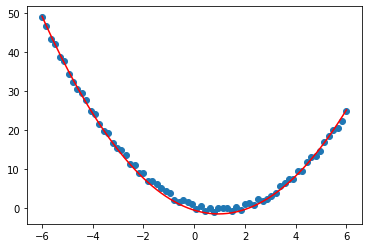

0.7514049117755455


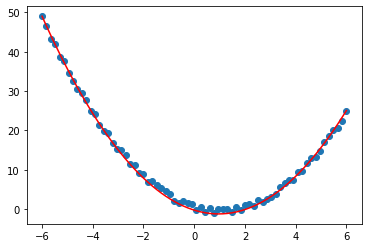

0.5703871546216538


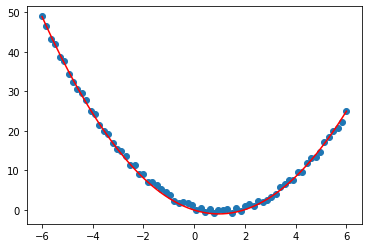

0.45421152369295625


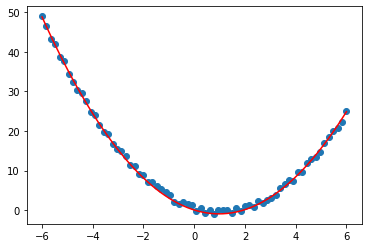

0.3796510085595888


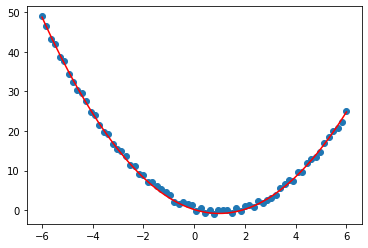

0.3317987148168061


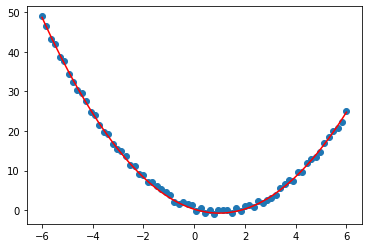

0.3010875265645567


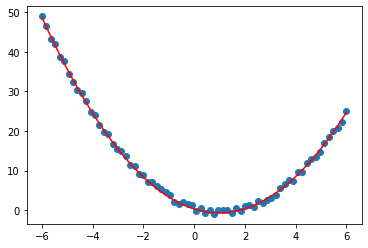

0.28137735156364885


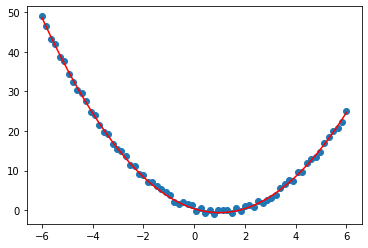

0.26872753172029024


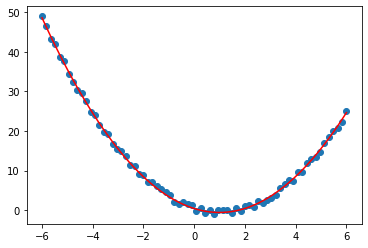

0.2606089867524219


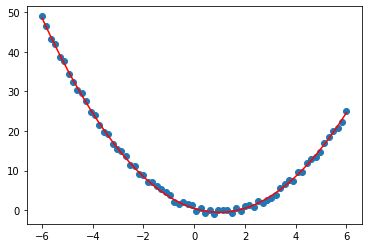

0

In [2]:
test_1()

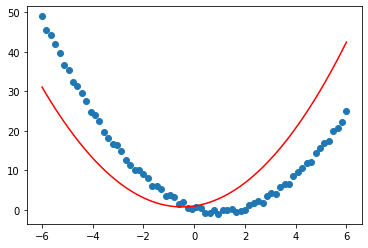

tensor(111.2919, dtype=torch.float64, grad_fn=<DivBackward0>)


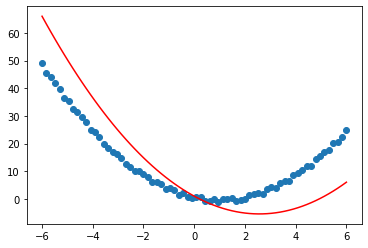

tensor(110.0941, dtype=torch.float64, grad_fn=<DivBackward0>)


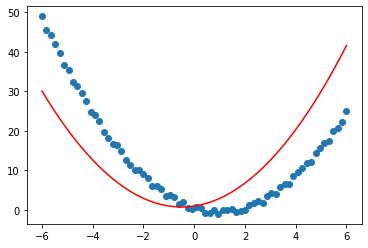

tensor(101.6391, dtype=torch.float64, grad_fn=<DivBackward0>)


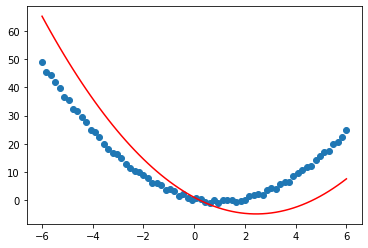

tensor(86.8301, dtype=torch.float64, grad_fn=<DivBackward0>)


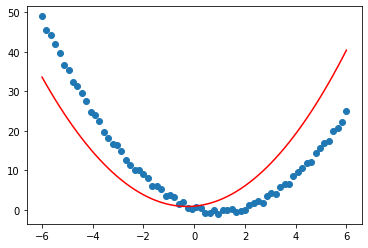

tensor(67.8391, dtype=torch.float64, grad_fn=<DivBackward0>)


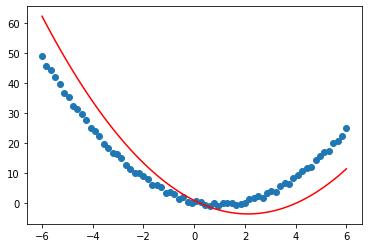

tensor(47.2885, dtype=torch.float64, grad_fn=<DivBackward0>)


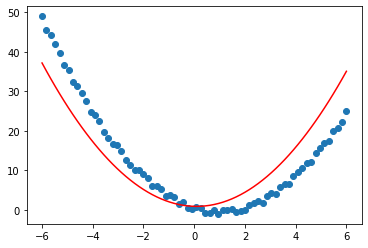

tensor(27.8089, dtype=torch.float64, grad_fn=<DivBackward0>)


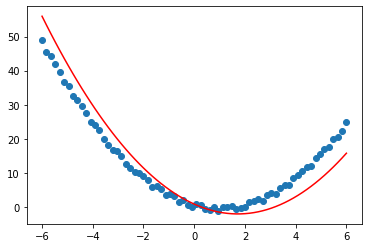

tensor(12.3321, dtype=torch.float64, grad_fn=<DivBackward0>)


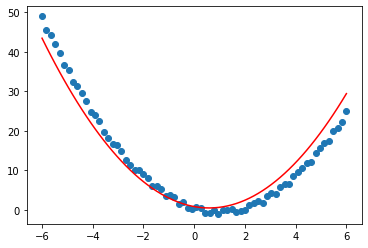

tensor(2.7355, dtype=torch.float64, grad_fn=<DivBackward0>)


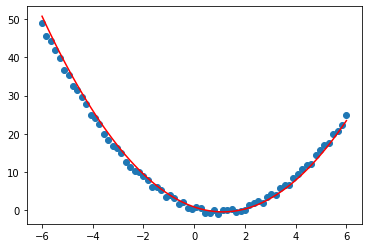

tensor(0.4477, dtype=torch.float64, grad_fn=<DivBackward0>)


In [3]:
test_2()